In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

In [2]:
from problem import Poisson_2d
from model import PDE_basis, TrainLS
from my_utils import plot_2d_tri, plot_domain_2d

pde rmse: 3.8922137086534715e-15


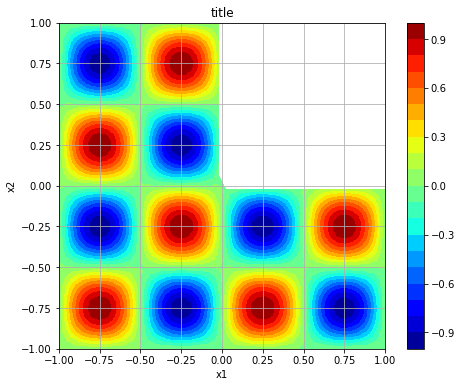

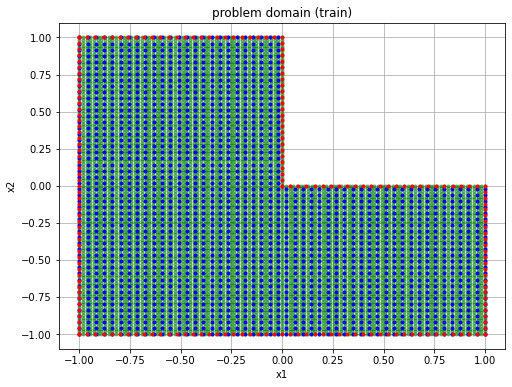

In [3]:
data = np.load('data/data.npz',allow_pickle=True)
my_prob = Poisson_2d(case=1, data=data)

x,u = my_prob.check_solution()
plot_2d_tri(x[:,0], x[:,1], u[:,0],shape='L-shape')

plot_domain_2d(x_pde=my_prob.x_pde, x_bd=my_prob.x_bd, x_test=my_prob.x_test)


In [4]:
basis_num_vec = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
shape_vec = [1, 1, 1, 1.5, 1.5,  1.5, 2, 2, 2, 2]
print(len(shape_vec))
print(len(basis_num_vec))


10
10


In [5]:
temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_pde_basis(shape=shape_vec[i], radius=1.5)
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None,weights=None,ls_mse=True,item_mse=False)

    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)
    # mse_test, info2 = train_ls.get_mse_data(x_in=my_prob.x_test, y_true=my_prob.target_test['u'],
    #                                         coef=coef_sol['u'], basis=basis)
    print(i,'Test MSE:', mse_test)
    temp_mse.append(mse_test)
mse_pde = np.array(temp_mse)

0 Test MSE: 0.08381510488741713
1 Test MSE: 1.1266421991178964e-06
2 Test MSE: 1.5767876145413283e-10
3 Test MSE: 3.2127537656045362e-12
4 Test MSE: 6.188656106541001e-14
5 Test MSE: 2.843627830838938e-15
6 Test MSE: 1.0070196490845295e-15
7 Test MSE: 6.494022757512819e-17
8 Test MSE: 2.0560346093303025e-17
9 Test MSE: 1.5041502076838585e-18


In [6]:
# basis.init_dnn(init_type='default')


temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_dnn(init_type='default')
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None,weights=None,ls_mse=True,item_mse=False)
    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)

    # mse_test, info2 = train_ls.get_mse_data(x_in=my_prob.x_test, y_true=my_prob.target_test['u'],
    #                                         coef=coef_sol['u'], basis=basis)

    print(i,'Test MSE:', mse_test)
    temp_mse.append(mse_test)


#
mse_dnn_default = np.array(temp_mse)

0 Test MSE: 0.026974353286509063
1 Test MSE: 4.51194130169956e-07
2 Test MSE: 8.609408858620231e-09
3 Test MSE: 2.9914824266552716e-09
4 Test MSE: 4.113563677158355e-10
5 Test MSE: 4.547186496989834e-10
6 Test MSE: 1.4771716443974974e-10
7 Test MSE: 8.710035945522426e-10
8 Test MSE: 1.6323293330019177e-10
9 Test MSE: 1.6883050864133645e-10


In [7]:
df = pd.DataFrame({'basis_num': basis_num_vec,
                   'mse_dnn_default': mse_dnn_default,
                   'mse_pde_basis': mse_pde})
df.to_csv(f'ls.csv',header=True, index=False, encoding='utf-8')

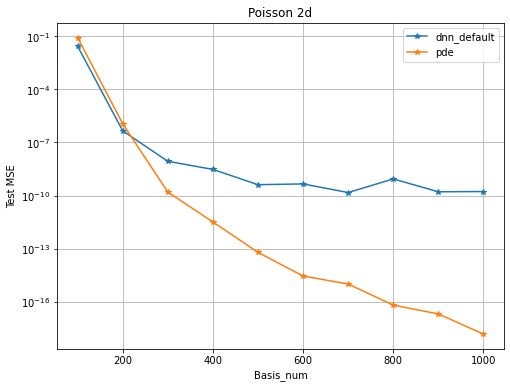

In [8]:
plt.figure(figsize=(8,6))
plt.plot(basis_num_vec, mse_dnn_default,'*-' ,label='dnn_default')
plt.plot(basis_num_vec, mse_pde,'*-', label='pde')
plt.yscale('log')
plt.legend()
plt.title('Poisson 2d')
plt.grid(which='both')
plt.xlabel('Basis_num')
plt.ylabel('Test MSE')
plt.show()


